In [17]:
from Simulator import Method, Simulator, ALL_GEARS

import matplotlib.pyplot as plt
import seaborn as sns

print(ALL_GEARS)

['OPENCL', 'CYTHON_THREADED', 'CYTHON_UNTHREADED', 'PYTHON']


In [18]:
avg_1 = dict(zip(ALL_GEARS,[1,10,20,25]))
std_1 = dict(zip(ALL_GEARS,[.5,2,2,2]))

avg_2 = dict(zip(ALL_GEARS,[1,10,10,20]))
std_2 = dict(zip(ALL_GEARS,[.5,2,2,2]))

avg_3 = dict(zip(ALL_GEARS,[7,7,7,7]))
std_3 = dict(zip(ALL_GEARS,[1,1,1,1]))

avg_anomaly = 40
std_anomaly = 10

bm = 10

max_iter = 300

#### Case study #0 : Normal w/ liquid

In [19]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
print("AFTER ONE BENCHMARK")
sim.print_methods()

print("AFTER SIMULATING")
sim.run_simulations_agent(iter_n=max_iter)
sim.print_methods()
sim.print_stats()

normal_liquid = sim

AFTER ONE BENCHMARK
['1', '2', '3'] 
OPENCL |0.9852| |0.9702| |0.2316| 
CYTHON_THREADED |0.0108| |0.0140| |0.2390| 
CYTHON_UNTHREADED |0.0024| |0.0125| |0.2243| 
PYTHON |0.0016| |0.0033| |0.3050| 

AFTER SIMULATING
['1', '2', '3'] 
OPENCL |0.9841| |0.9680| |0.2658| 
CYTHON_THREADED |0.0100| |0.0116| |0.2218| 
CYTHON_UNTHREADED |0.0036| |0.0166| |0.2605| 
PYTHON |0.0023| |0.0038| |0.2520| 

Ran the entire workflow a total of 300 times
The average time to run all methods was 9.97 std_dev 3.60
Method 1 used OPENCL the most (96.0%)
Method 2 used OPENCL the most (96.3%)
Method 3 used CYTHON_UNTHREADED the most (30.3%)


#### Case study #1 : Anomaly w/liquid

In [20]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=max_iter, ano_start=50, ano_end=100, affected_gear=ALL_GEARS[0],
                                     new_avg=avg_anomaly, new_std=std_anomaly)
sim.print_methods()
sim.print_stats()

liquid_anomaly = sim

['1', '2', '3'] 
OPENCL |0.9819| |0.9789| |0.2644| 
CYTHON_THREADED |0.0125| |0.0095| |0.2369| 
CYTHON_UNTHREADED |0.0034| |0.0088| |0.2550| 
PYTHON |0.0022| |0.0028| |0.2436| 

['1', '2', '3'] 
OPENCL |0.9724| |0.9697| |0.2558| 
CYTHON_THREADED |0.0186| |0.0122| |0.2121| 
CYTHON_UNTHREADED |0.0055| |0.0138| |0.2776| 
PYTHON |0.0035| |0.0043| |0.2546| 

Ran the entire workflow a total of 300 times
The average time to run all methods was 22.30 std_dev 13.65
Method 1 used OPENCL the most (45.3%)
Method 2 used OPENCL the most (46.3%)
Method 3 used CYTHON_UNTHREADED the most (29.7%)


#### Case study #3 : Permanent w/ liquid

In [21]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=max_iter, ano_start=50, ano_end=max_iter+1, affected_gear=ALL_GEARS[0],
                                     new_avg=avg_anomaly, new_std=std_anomaly)
sim.print_methods()
sim.print_stats()

liquid_perm = sim

['1', '2', '3'] 
OPENCL |0.9787| |0.9864| |0.2057| 
CYTHON_THREADED |0.0155| |0.0063| |0.2706| 
CYTHON_UNTHREADED |0.0033| |0.0058| |0.2953| 
PYTHON |0.0025| |0.0015| |0.2283| 

['1', '2', '3'] 
OPENCL |0.0031| |0.0032| |0.0016| 
CYTHON_THREADED |0.6809| |0.4484| |0.3731| 
CYTHON_UNTHREADED |0.1928| |0.4255| |0.3322| 
PYTHON |0.1232| |0.1229| |0.2931| 

Ran the entire workflow a total of 300 times
The average time to run all methods was 29.15 std_dev 13.15
Method 1 used CYTHON_THREADED the most (55.3%)
Method 2 used CYTHON_UNTHREADED the most (37.7%)
Method 3 used CYTHON_UNTHREADED the most (36.3%)


#### Case study #4 : Normal w/o liquid

In [22]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
print("AFTER ONE BENCHMARK")
sim.print_methods()

print("AFTER SIMULATING")
sim.run_simulations(iter_n=max_iter, solid=True)
sim.print_methods()
sim.print_stats()

normal_solid = sim

AFTER ONE BENCHMARK
['1', '2', '3'] 
OPENCL |0.9796| |0.9659| |0.2620| 
CYTHON_THREADED |0.0152| |0.0156| |0.2464| 
CYTHON_UNTHREADED |0.0033| |0.0151| |0.2499| 
PYTHON |0.0020| |0.0035| |0.2417| 

AFTER SIMULATING
['1', '2', '3'] 
OPENCL |0.9791| |0.9847| |0.2538| 
CYTHON_THREADED |0.0155| |0.0070| |0.2491| 
CYTHON_UNTHREADED |0.0033| |0.0068| |0.2527| 
PYTHON |0.0020| |0.0016| |0.2444| 

Ran the entire workflow a total of 300 times
The average time to run all methods was 8.90 std_dev 1.15
Method 1 used OPENCL the most (100.0%)
Method 2 used OPENCL the most (100.0%)
Method 3 used OPENCL the most (100.0%)


#### Case study #5 : Anomaly w/o liquid

In [23]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=max_iter, ano_start=50, ano_end=100, affected_gear=ALL_GEARS[0], 
                              new_avg=avg_anomaly, new_std=std_anomaly, solid=True)
sim.print_methods()
sim.print_stats()

solid_anomaly = sim

['1', '2', '3'] 
OPENCL |0.9919| |0.9739| |0.2279| 
CYTHON_THREADED |0.0057| |0.0123| |0.2421| 
CYTHON_UNTHREADED |0.0014| |0.0110| |0.2183| 
PYTHON |0.0010| |0.0028| |0.3117| 

['1', '2', '3'] 
OPENCL |0.9908| |0.9747| |0.2382| 
CYTHON_THREADED |0.0065| |0.0120| |0.2389| 
CYTHON_UNTHREADED |0.0016| |0.0107| |0.2154| 
PYTHON |0.0011| |0.0027| |0.3075| 

Ran the entire workflow a total of 300 times
The average time to run all methods was 27.60 std_dev 42.75
Method 1 used OPENCL the most (100.0%)
Method 2 used OPENCL the most (100.0%)
Method 3 used OPENCL the most (100.0%)


#### Case study #6: Permanent w/o liquid

In [24]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=max_iter, ano_start=0, ano_end=301, affected_gear=ALL_GEARS[0],
                               new_avg=avg_anomaly, new_std=std_anomaly, solid=True)
sim.print_methods()
sim.print_stats()

solid_perm = sim

['1', '2', '3'] 
OPENCL |0.9848| |0.9852| |0.2885| 
CYTHON_THREADED |0.0113| |0.0067| |0.2690| 
CYTHON_UNTHREADED |0.0025| |0.0063| |0.2380| 
PYTHON |0.0015| |0.0017| |0.2045| 

['1', '2', '3'] 
OPENCL |0.0299| |0.0320| |0.0084| 
CYTHON_THREADED |0.7189| |0.4396| |0.3749| 
CYTHON_UNTHREADED |0.1578| |0.4151| |0.3318| 
PYTHON |0.0934| |0.1133| |0.2850| 

Ran the entire workflow a total of 300 times
The average time to run all methods was 119.79 std_dev 17.55
Method 1 used OPENCL the most (100.0%)
Method 2 used OPENCL the most (100.0%)
Method 3 used OPENCL the most (100.0%)


In [25]:
import pandas as pd 

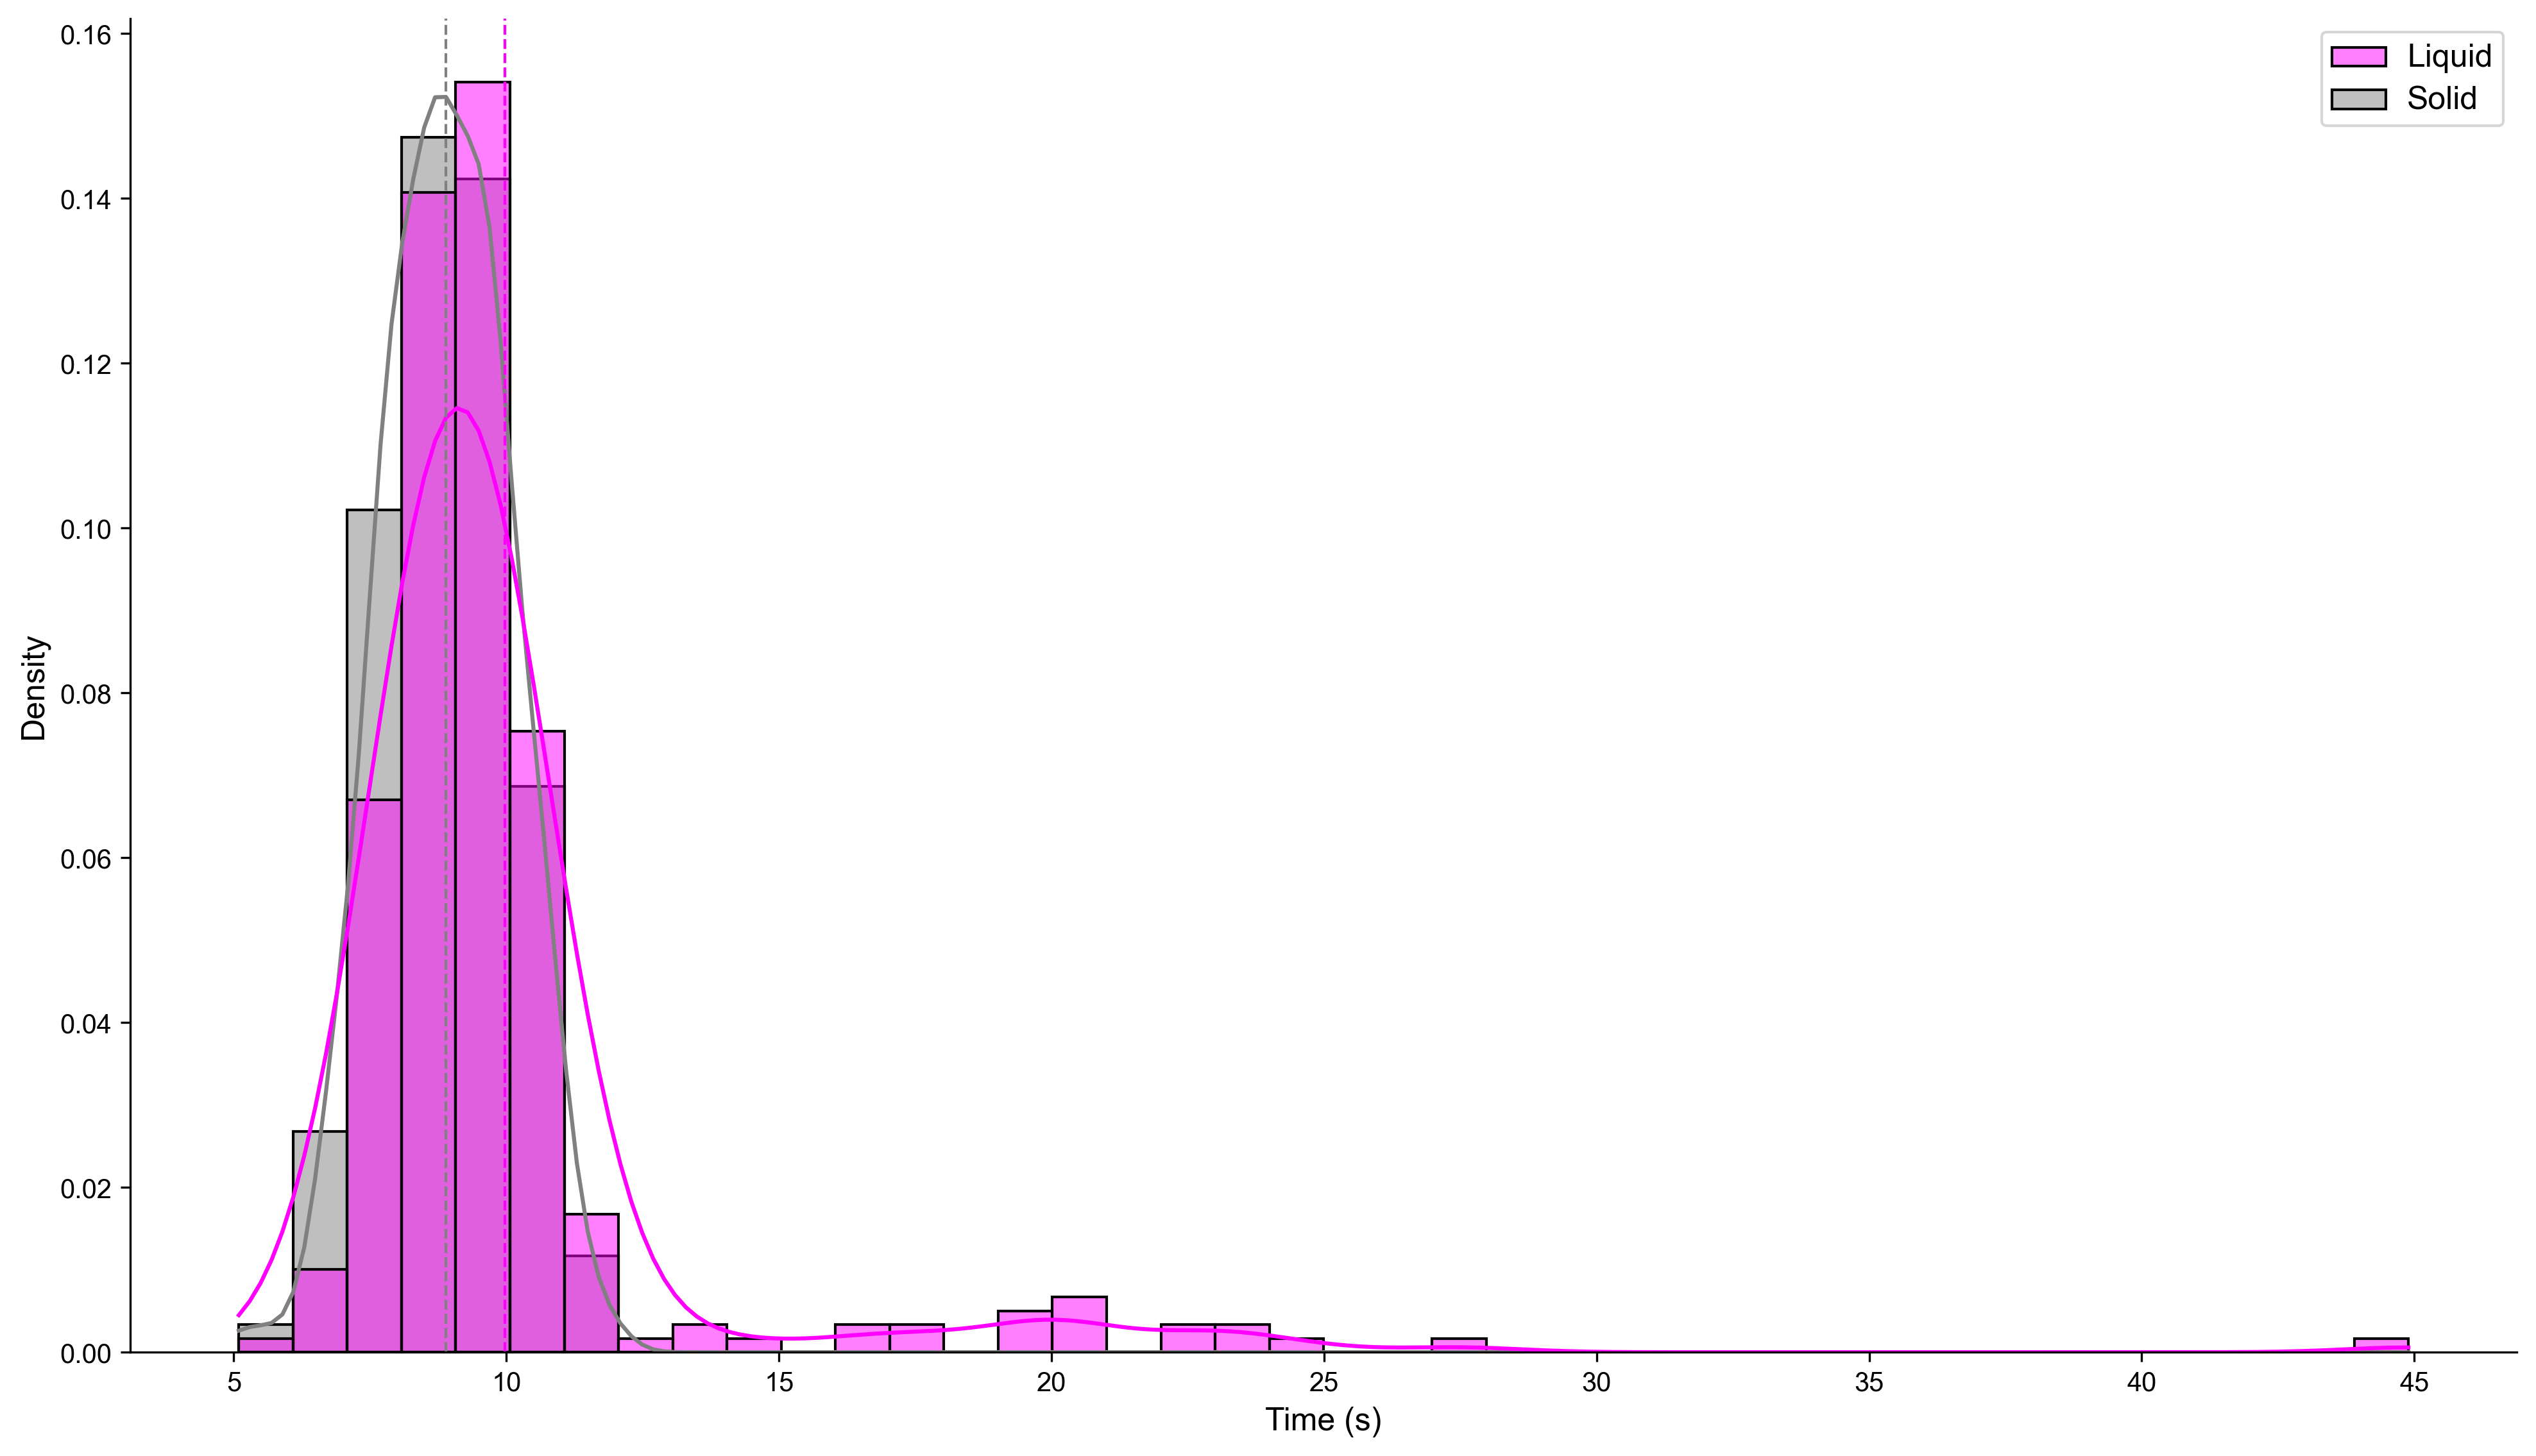

In [51]:
# Normal
df = pd.DataFrame({'Liquid':normal_liquid.total_time,'Solid':normal_solid.total_time})

plt.figure(figsize=(16,9), dpi=300)
ax = sns.histplot(data=df, bins=40, stat='density', kde=True, palette=['magenta','gray'])
plt.axvline(df['Liquid'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['Solid'].mean(), color='gray', linestyle='dashed', linewidth=1)
plt.xlabel('Time (s)', fontname='Arial', fontsize=12)
plt.ylabel('Density', fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
plt.setp(ax.get_legend().get_texts(), fontname="Arial", fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

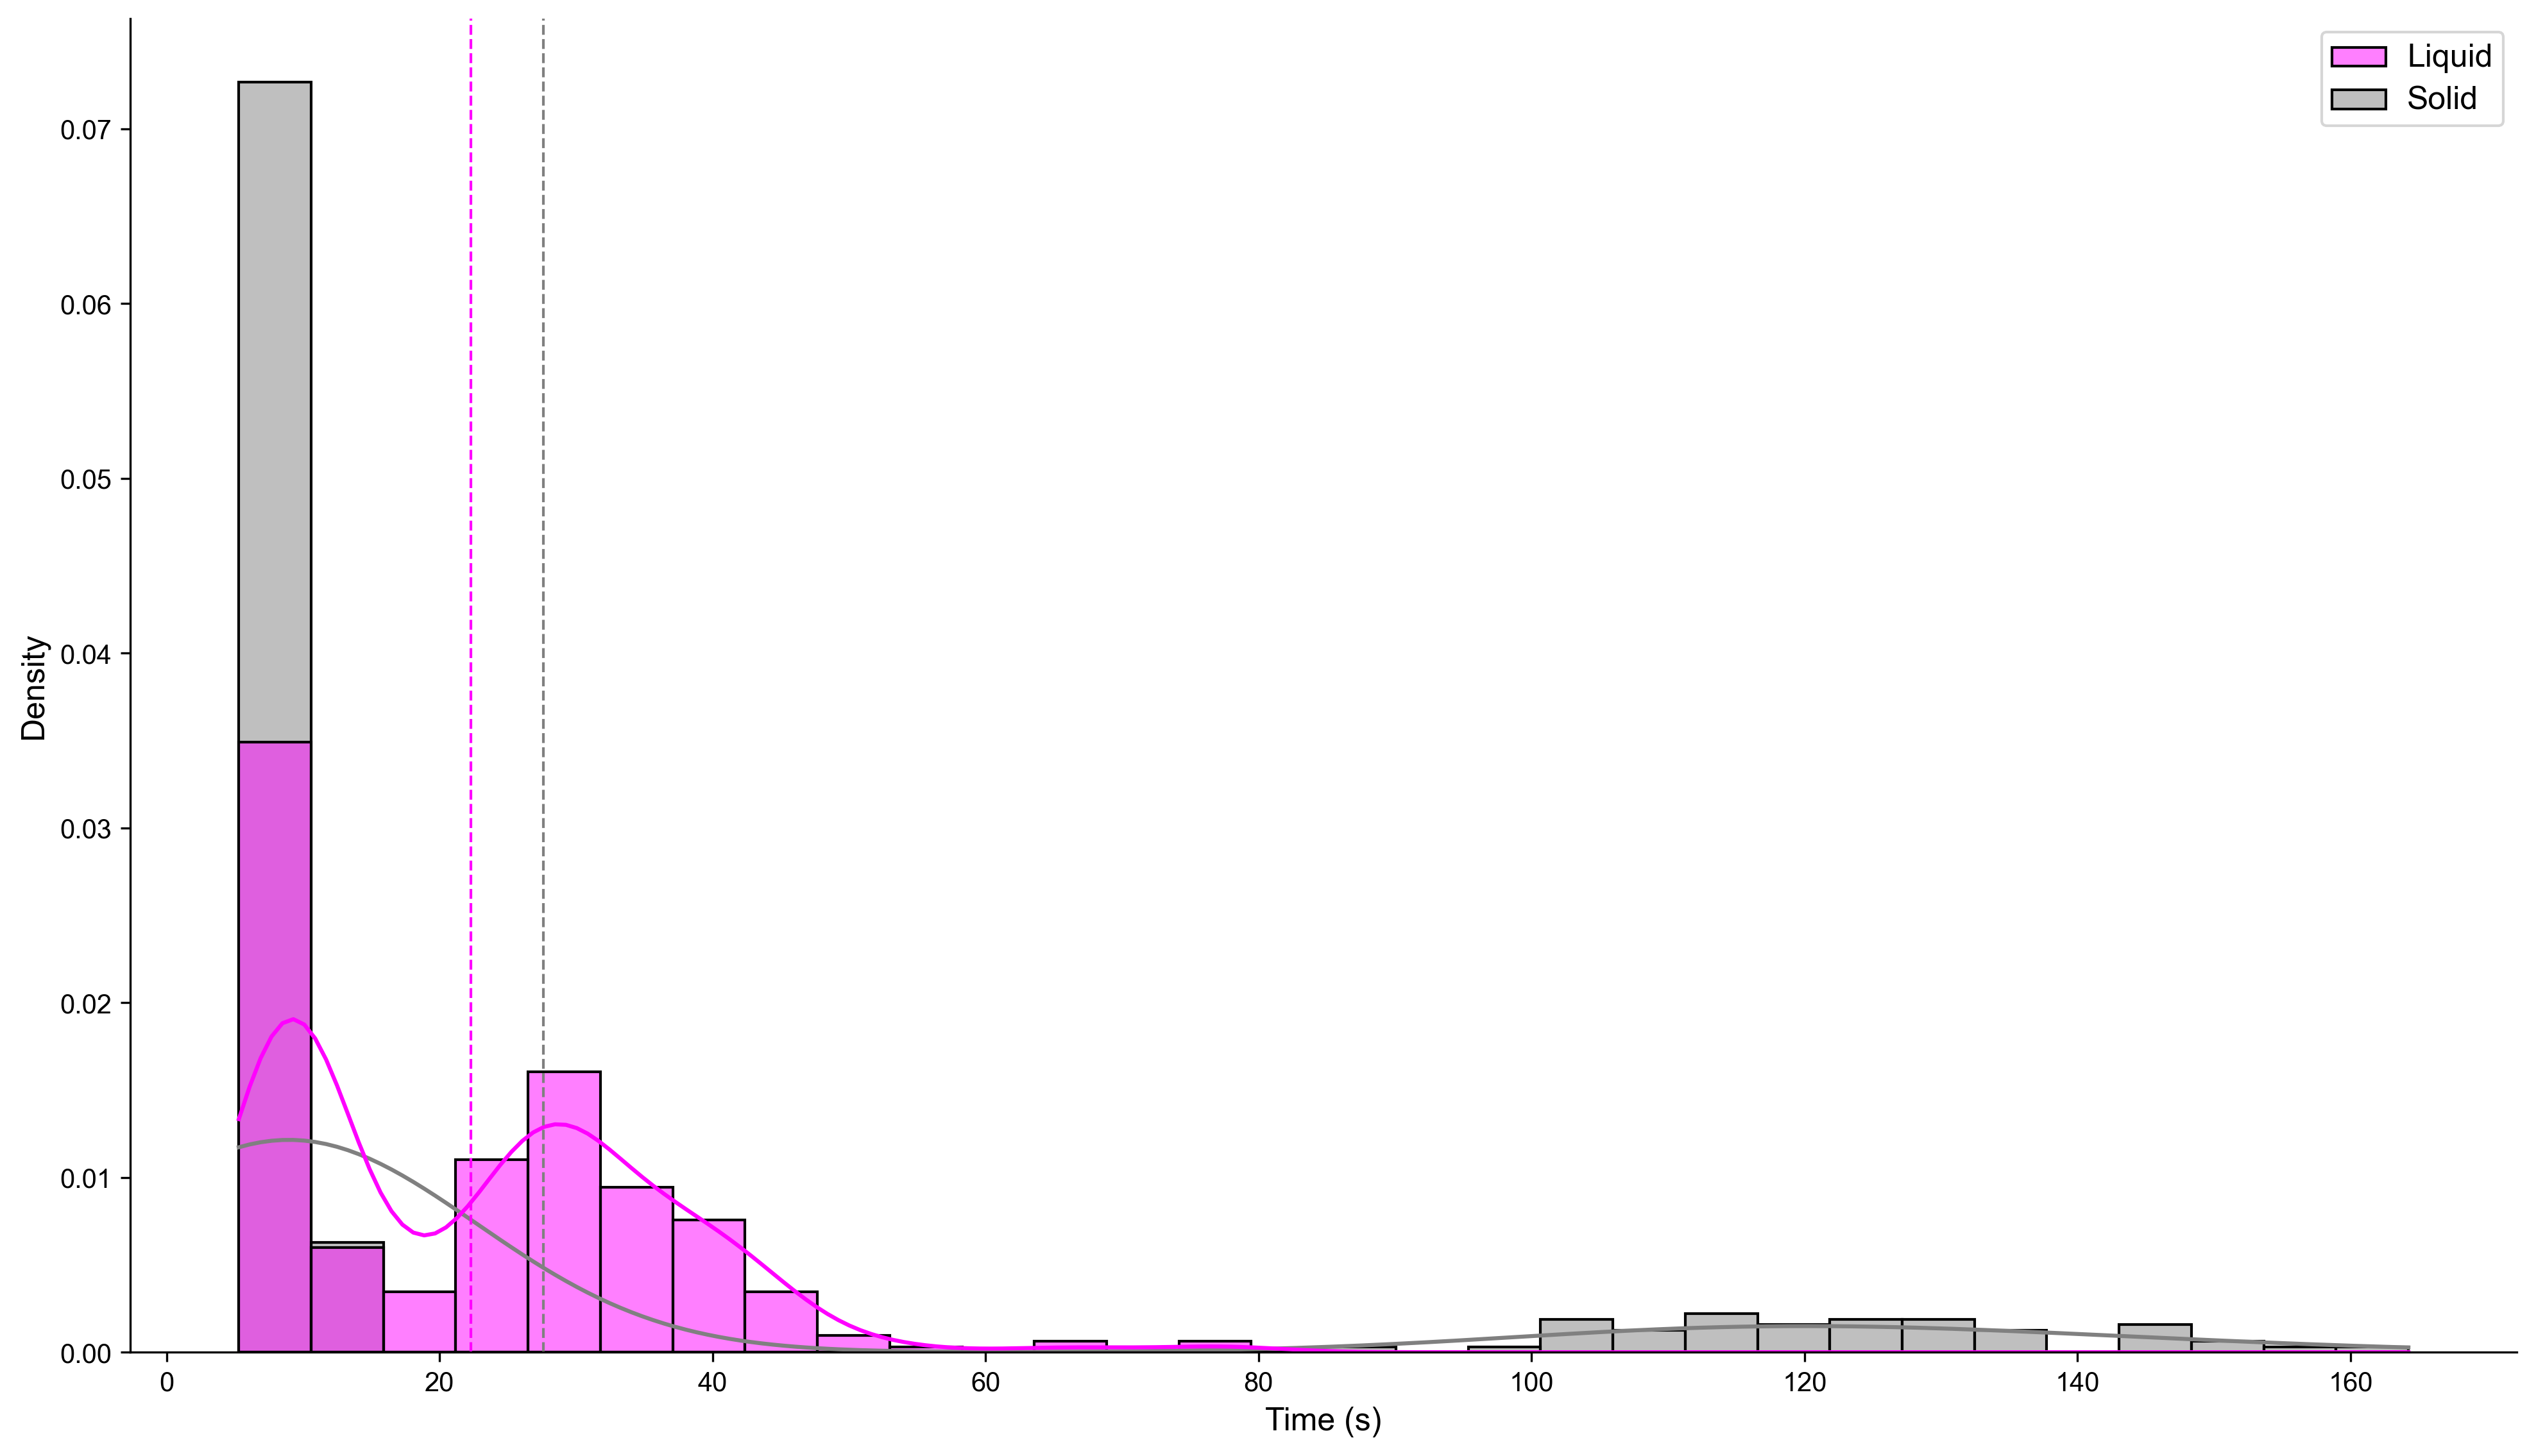

In [52]:
# Anomaly
df = pd.DataFrame({'Liquid':liquid_anomaly.total_time,'Solid':solid_anomaly.total_time})

plt.figure(figsize=(16,9), dpi=300)
ax = sns.histplot(data=df, bins=30, stat='density', kde=True, palette=['magenta','gray'])
plt.axvline(df['Liquid'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['Solid'].mean(), color='gray', linestyle='dashed', linewidth=1)
plt.xlabel('Time (s)', fontname='Arial', fontsize=12)
plt.ylabel('Density', fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
plt.setp(ax.get_legend().get_texts(), fontname="Arial", fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

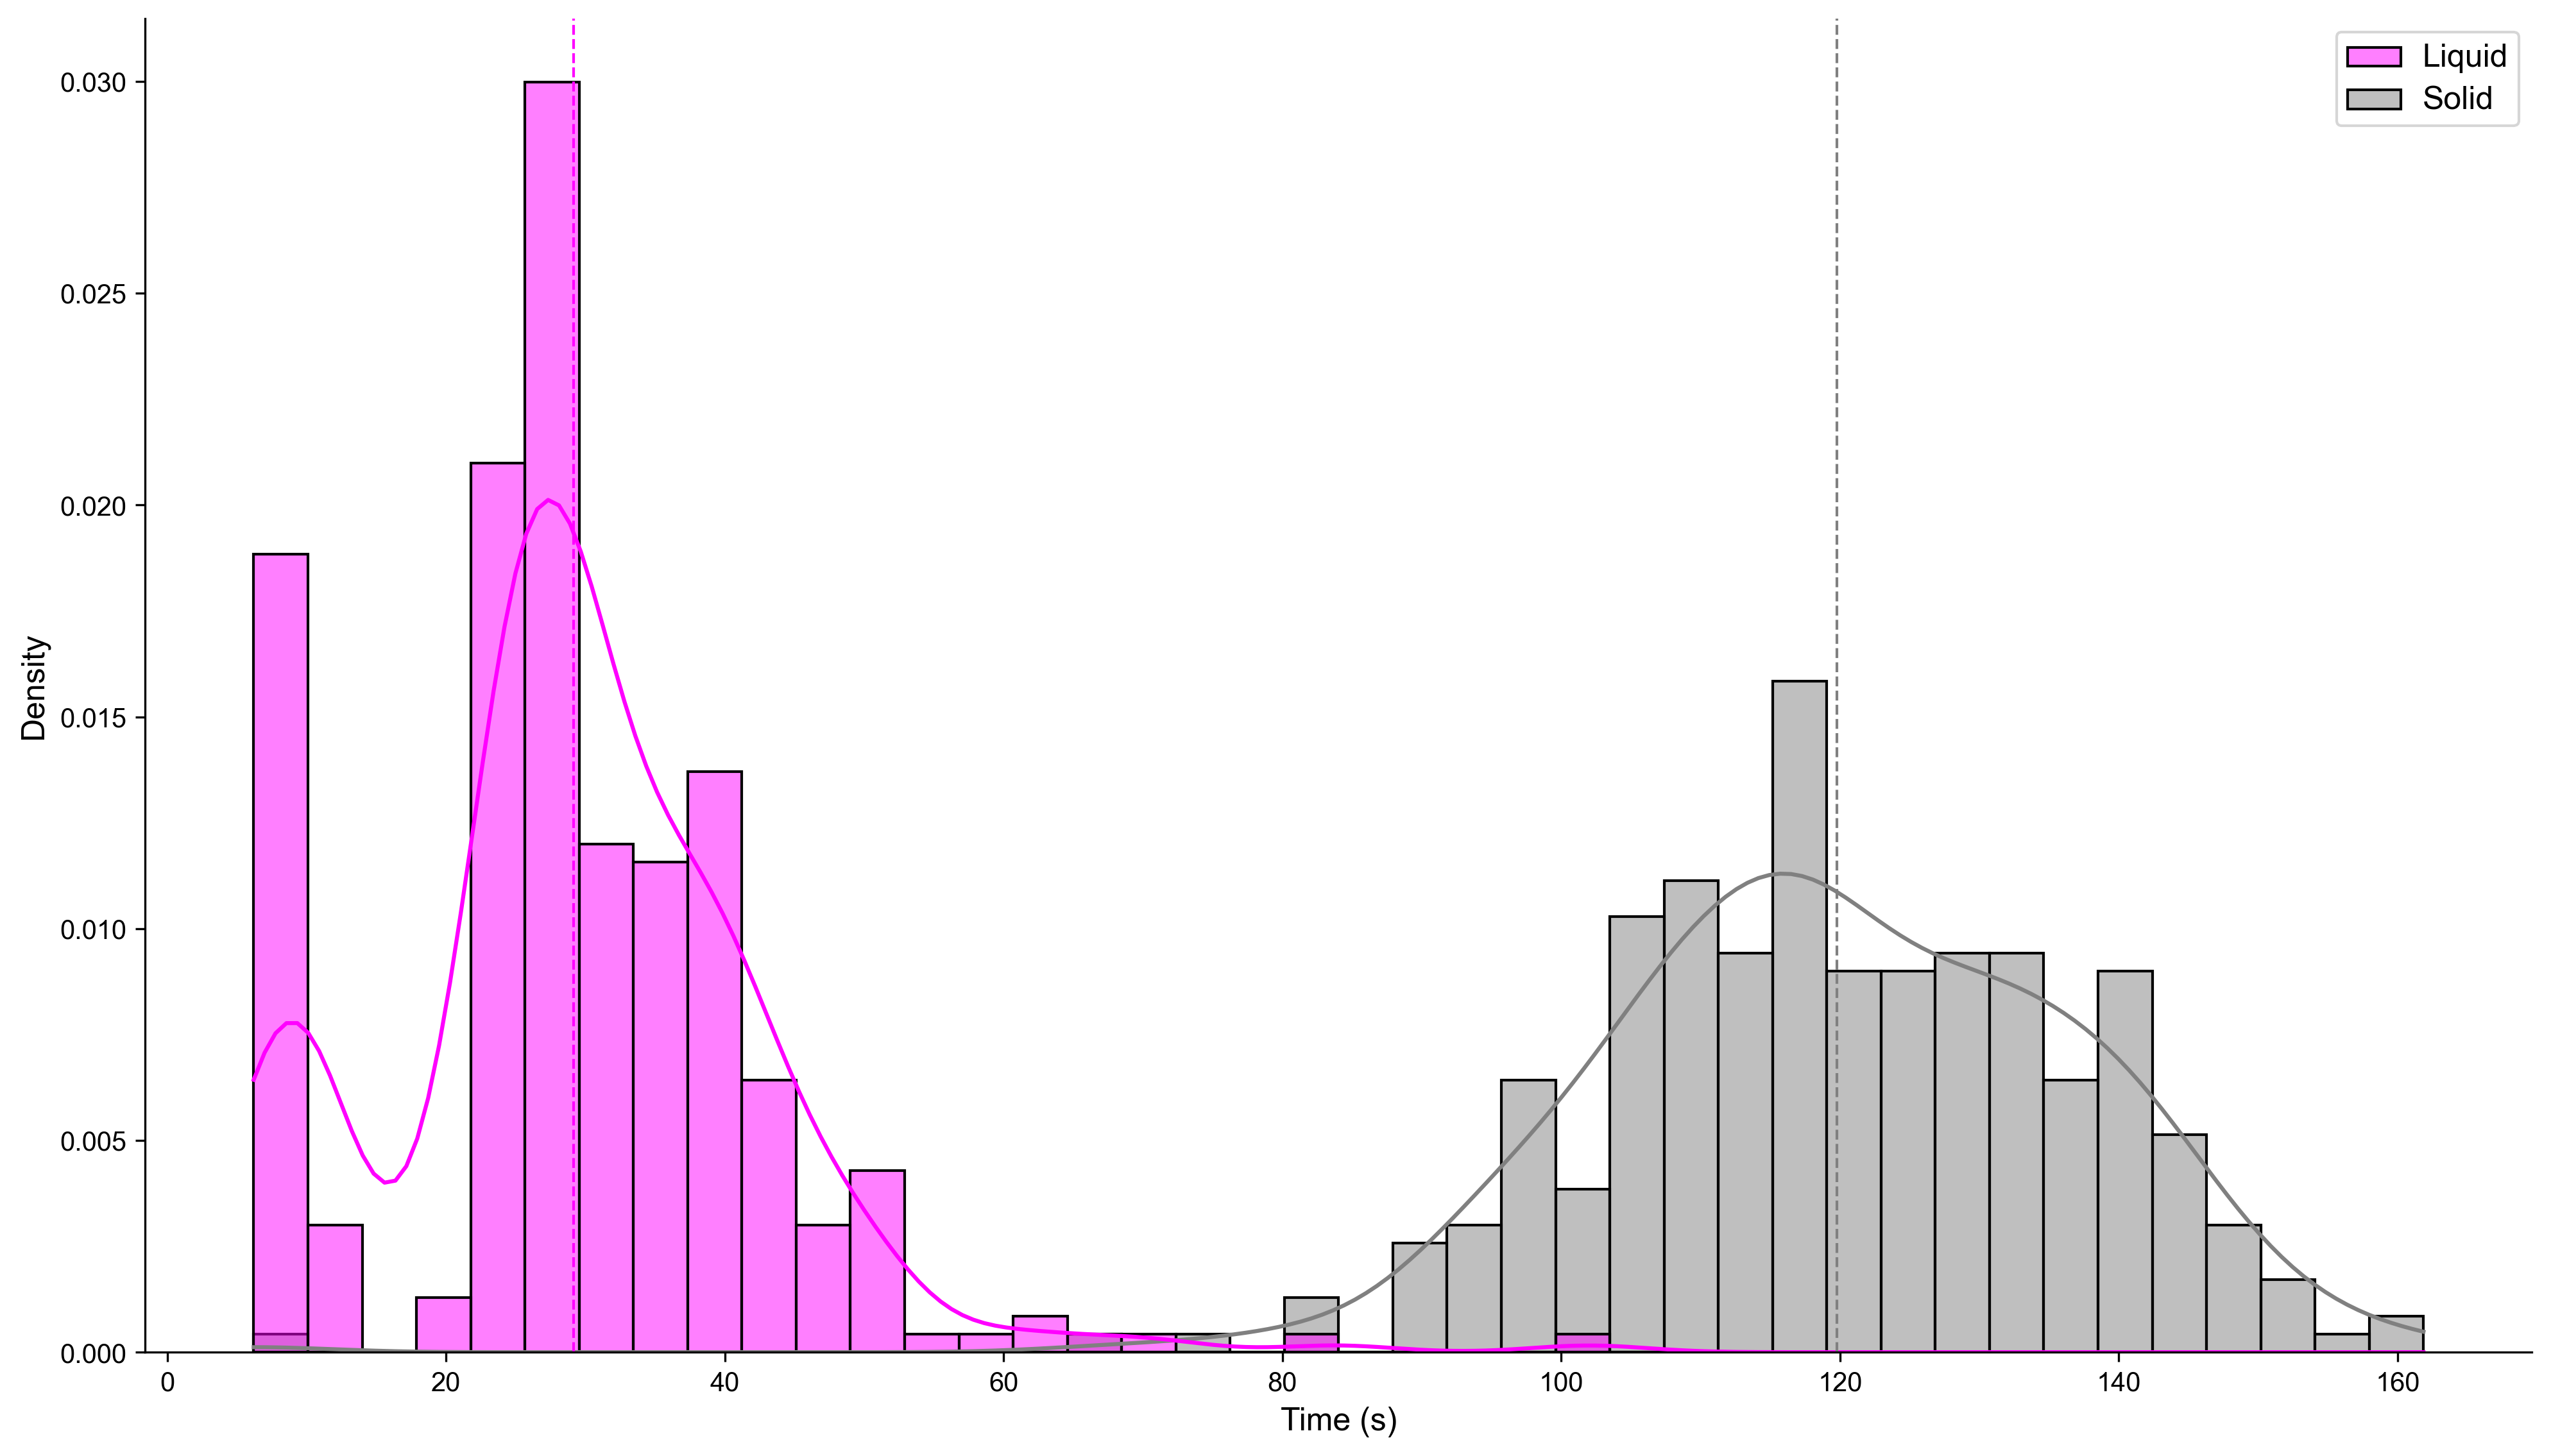

In [53]:
# Perm
df = pd.DataFrame({'Liquid':liquid_perm.total_time,'Solid':solid_perm.total_time})

plt.figure(figsize=(16,9), dpi=300)
ax= sns.histplot(data=df, bins=40, stat='density', kde=True, palette=['magenta','gray'])
plt.axvline(df['Liquid'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['Solid'].mean(), color='gray', linestyle='dashed', linewidth=1)
plt.xlabel('Time (s)')
plt.xlabel('Time (s)', fontname='Arial', fontsize=12)
plt.ylabel('Density', fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
plt.setp(ax.get_legend().get_texts(), fontname="Arial", fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

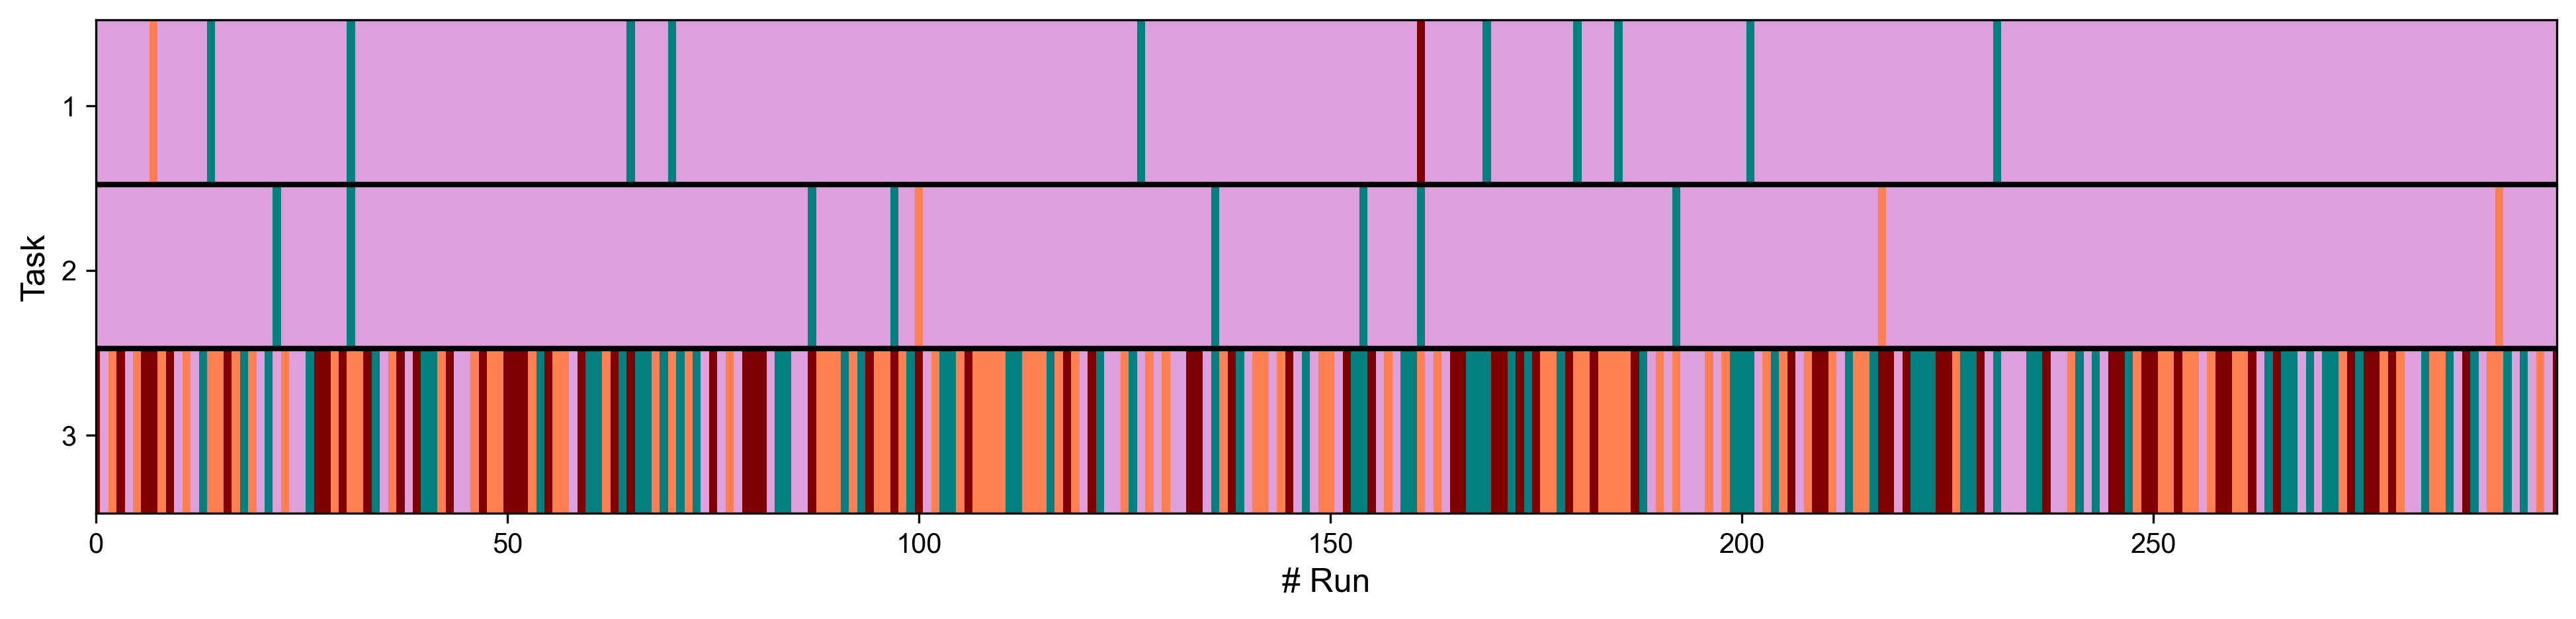

In [66]:
# Matrix where lines correspond to the workflow run and columns methods
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import resize

matrix = np.zeros((max_iter,3))
for i in range(max_iter):
    for m in range(3):
        matrix[i,m] = ALL_GEARS.index(normal_liquid.gears[i][m])

matrix_resized = resize(matrix, (max_iter, 60), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "coral","maroon"])

label_ticks = ['1','2','3']
value_ticks = [10,30,50]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=300)
ax.imshow(matrix_resized.T, cmap=cmap)

ax.plot([0,max_iter], [19.5,19.5], color='black', linewidth=2)
ax.plot([0,max_iter], [39.5,39.5], color='black', linewidth=2)

ax.set_yticks(value_ticks, labels=label_ticks)
ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run', fontname='Arial', fontsize=12)
ax.set_ylabel("Task", fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")


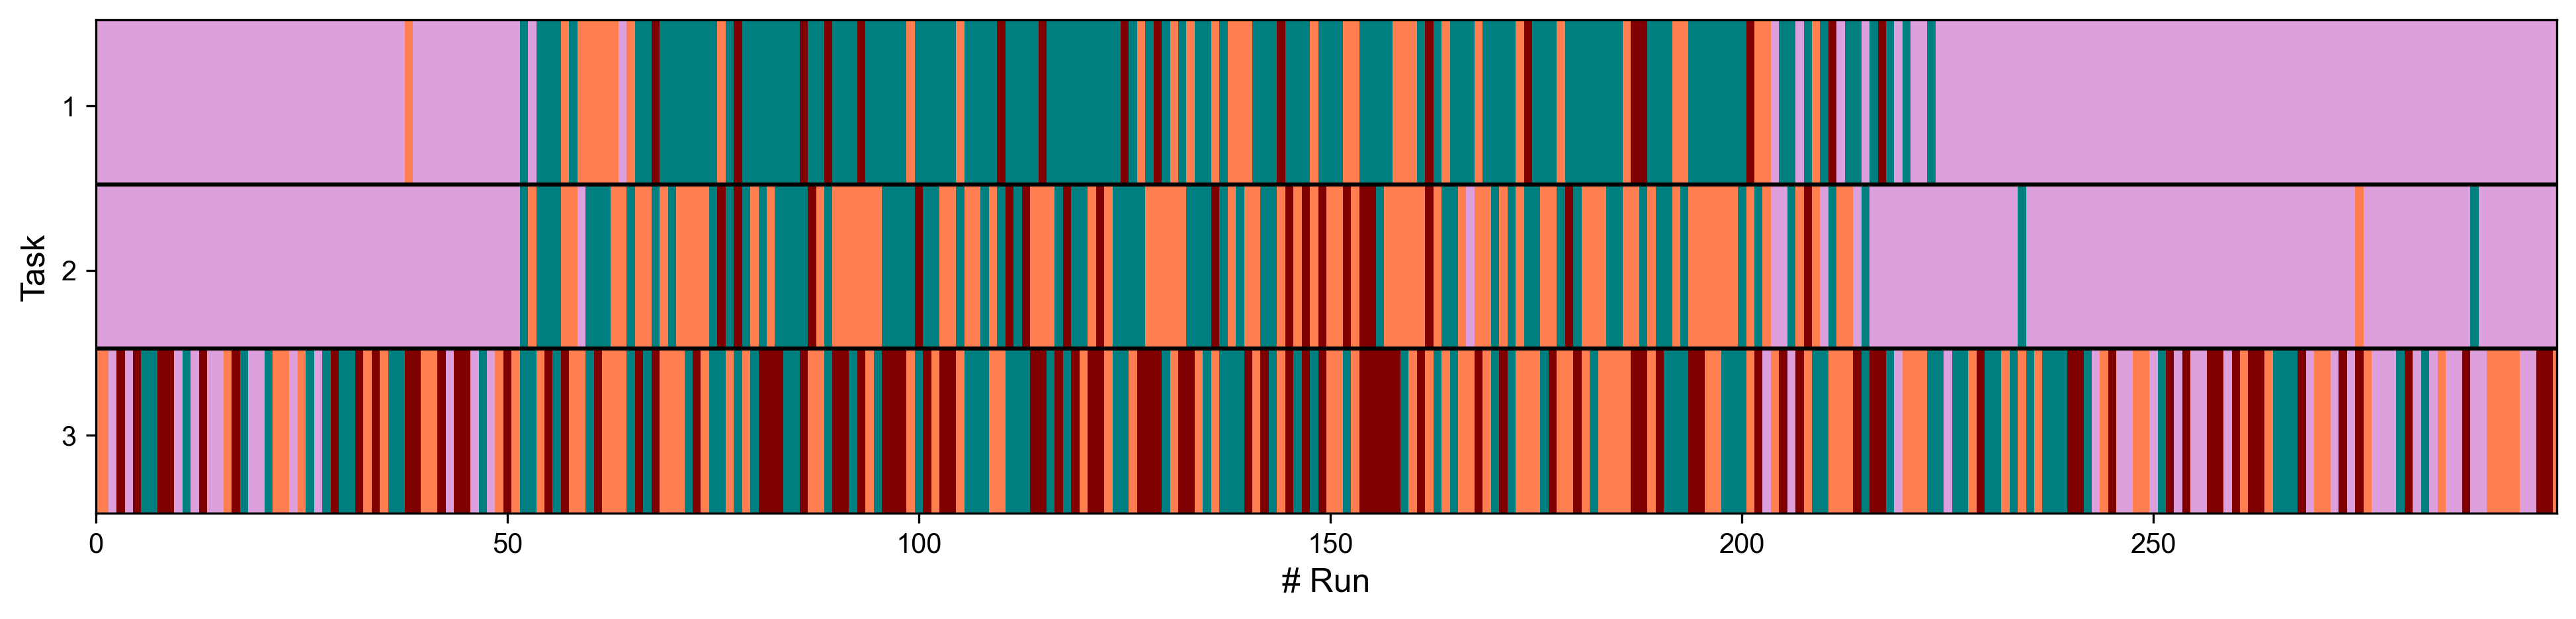

In [67]:
matrix = np.zeros((max_iter,3))
for i in range(max_iter):
    for m in range(3):
        matrix[i,m] = ALL_GEARS.index(liquid_anomaly.gears[i][m])

matrix_resized = resize(matrix, (max_iter, 60), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "coral", "maroon"])

label_ticks = ['1','2','3']
value_ticks = [10,30,50]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=300)
ax.imshow(matrix_resized.T, cmap=cmap)

ax.plot([0,max_iter], [19.5,19.5], color='black', linewidth=1.5)
ax.plot([0,max_iter], [39.5,39.5], color='black', linewidth=1.5)

ax.set_yticks(value_ticks, labels=label_ticks)
ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run', fontname='Arial', fontsize=12)
ax.set_ylabel("Task", fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")

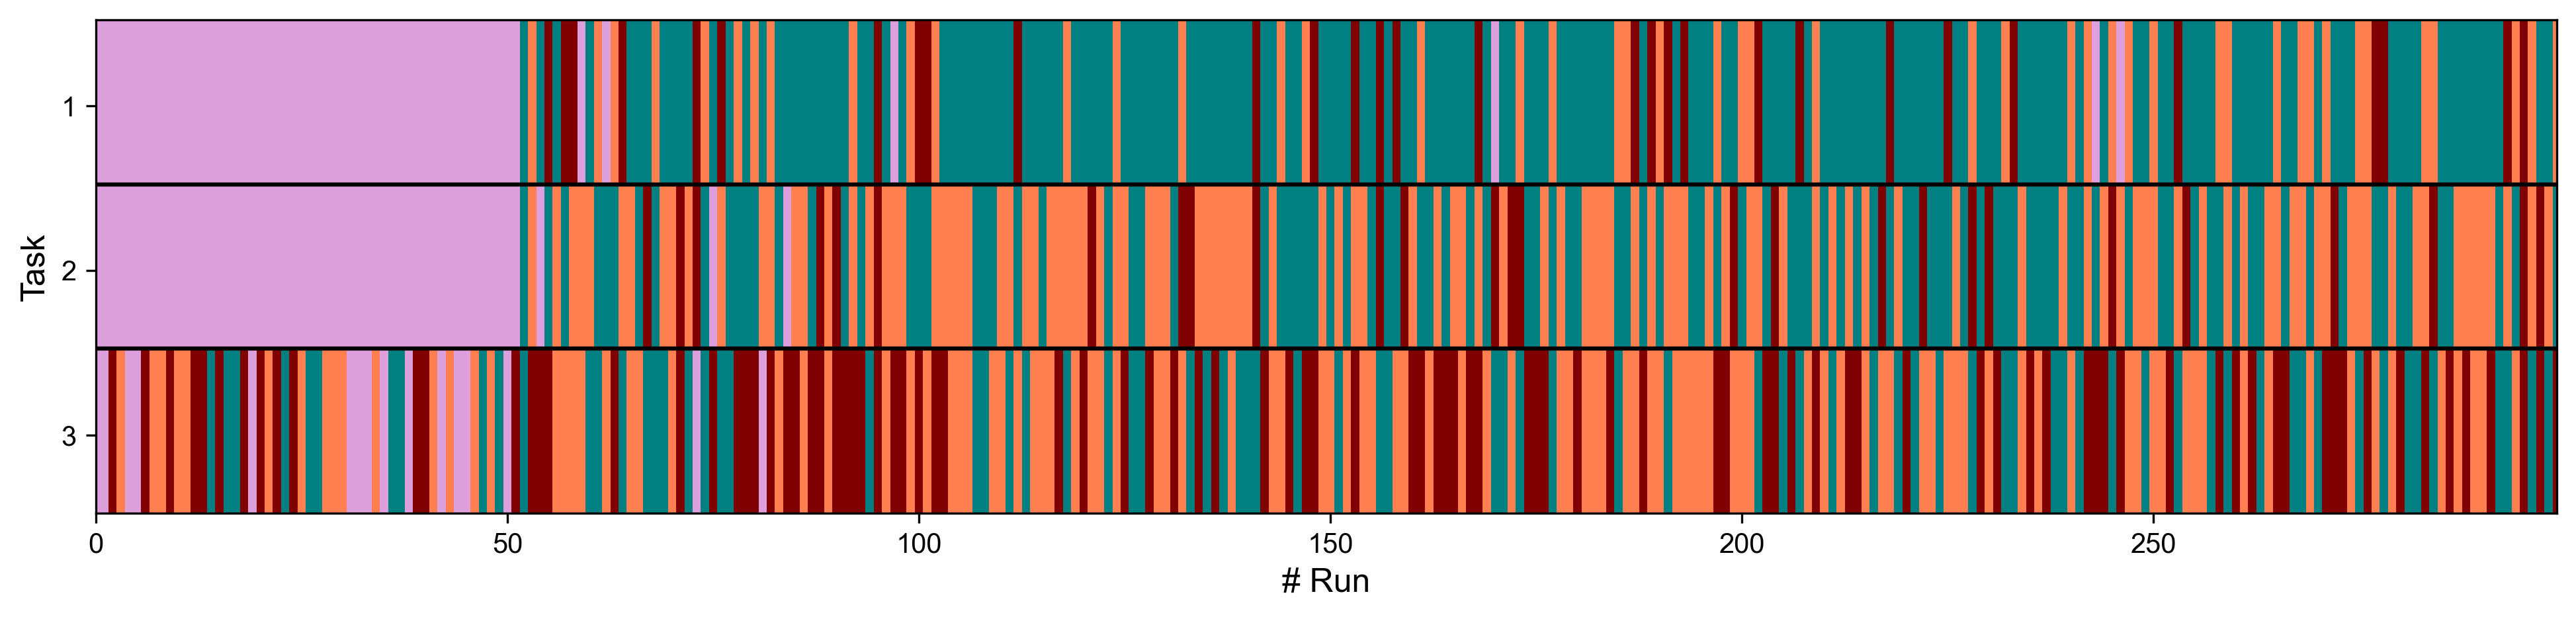

In [68]:
matrix = np.zeros((max_iter,3))
for i in range(max_iter):
    for m in range(3):
        matrix[i,m] = ALL_GEARS.index(liquid_perm.gears[i][m])

matrix_resized = resize(matrix, (max_iter, 60), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "coral", "maroon"])

label_ticks = ['1','2','3']
value_ticks = [10,30,50]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=300)
p = ax.imshow(matrix_resized.T, cmap=cmap)

ax.plot([0,max_iter], [19.5,19.5], color='black', linewidth=1.5)
ax.plot([0,max_iter], [39.5,39.5], color='black', linewidth=1.5)

ax.set_yticks(value_ticks, labels=label_ticks)
ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run', fontname='Arial', fontsize=12)
ax.set_ylabel("Task", fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")


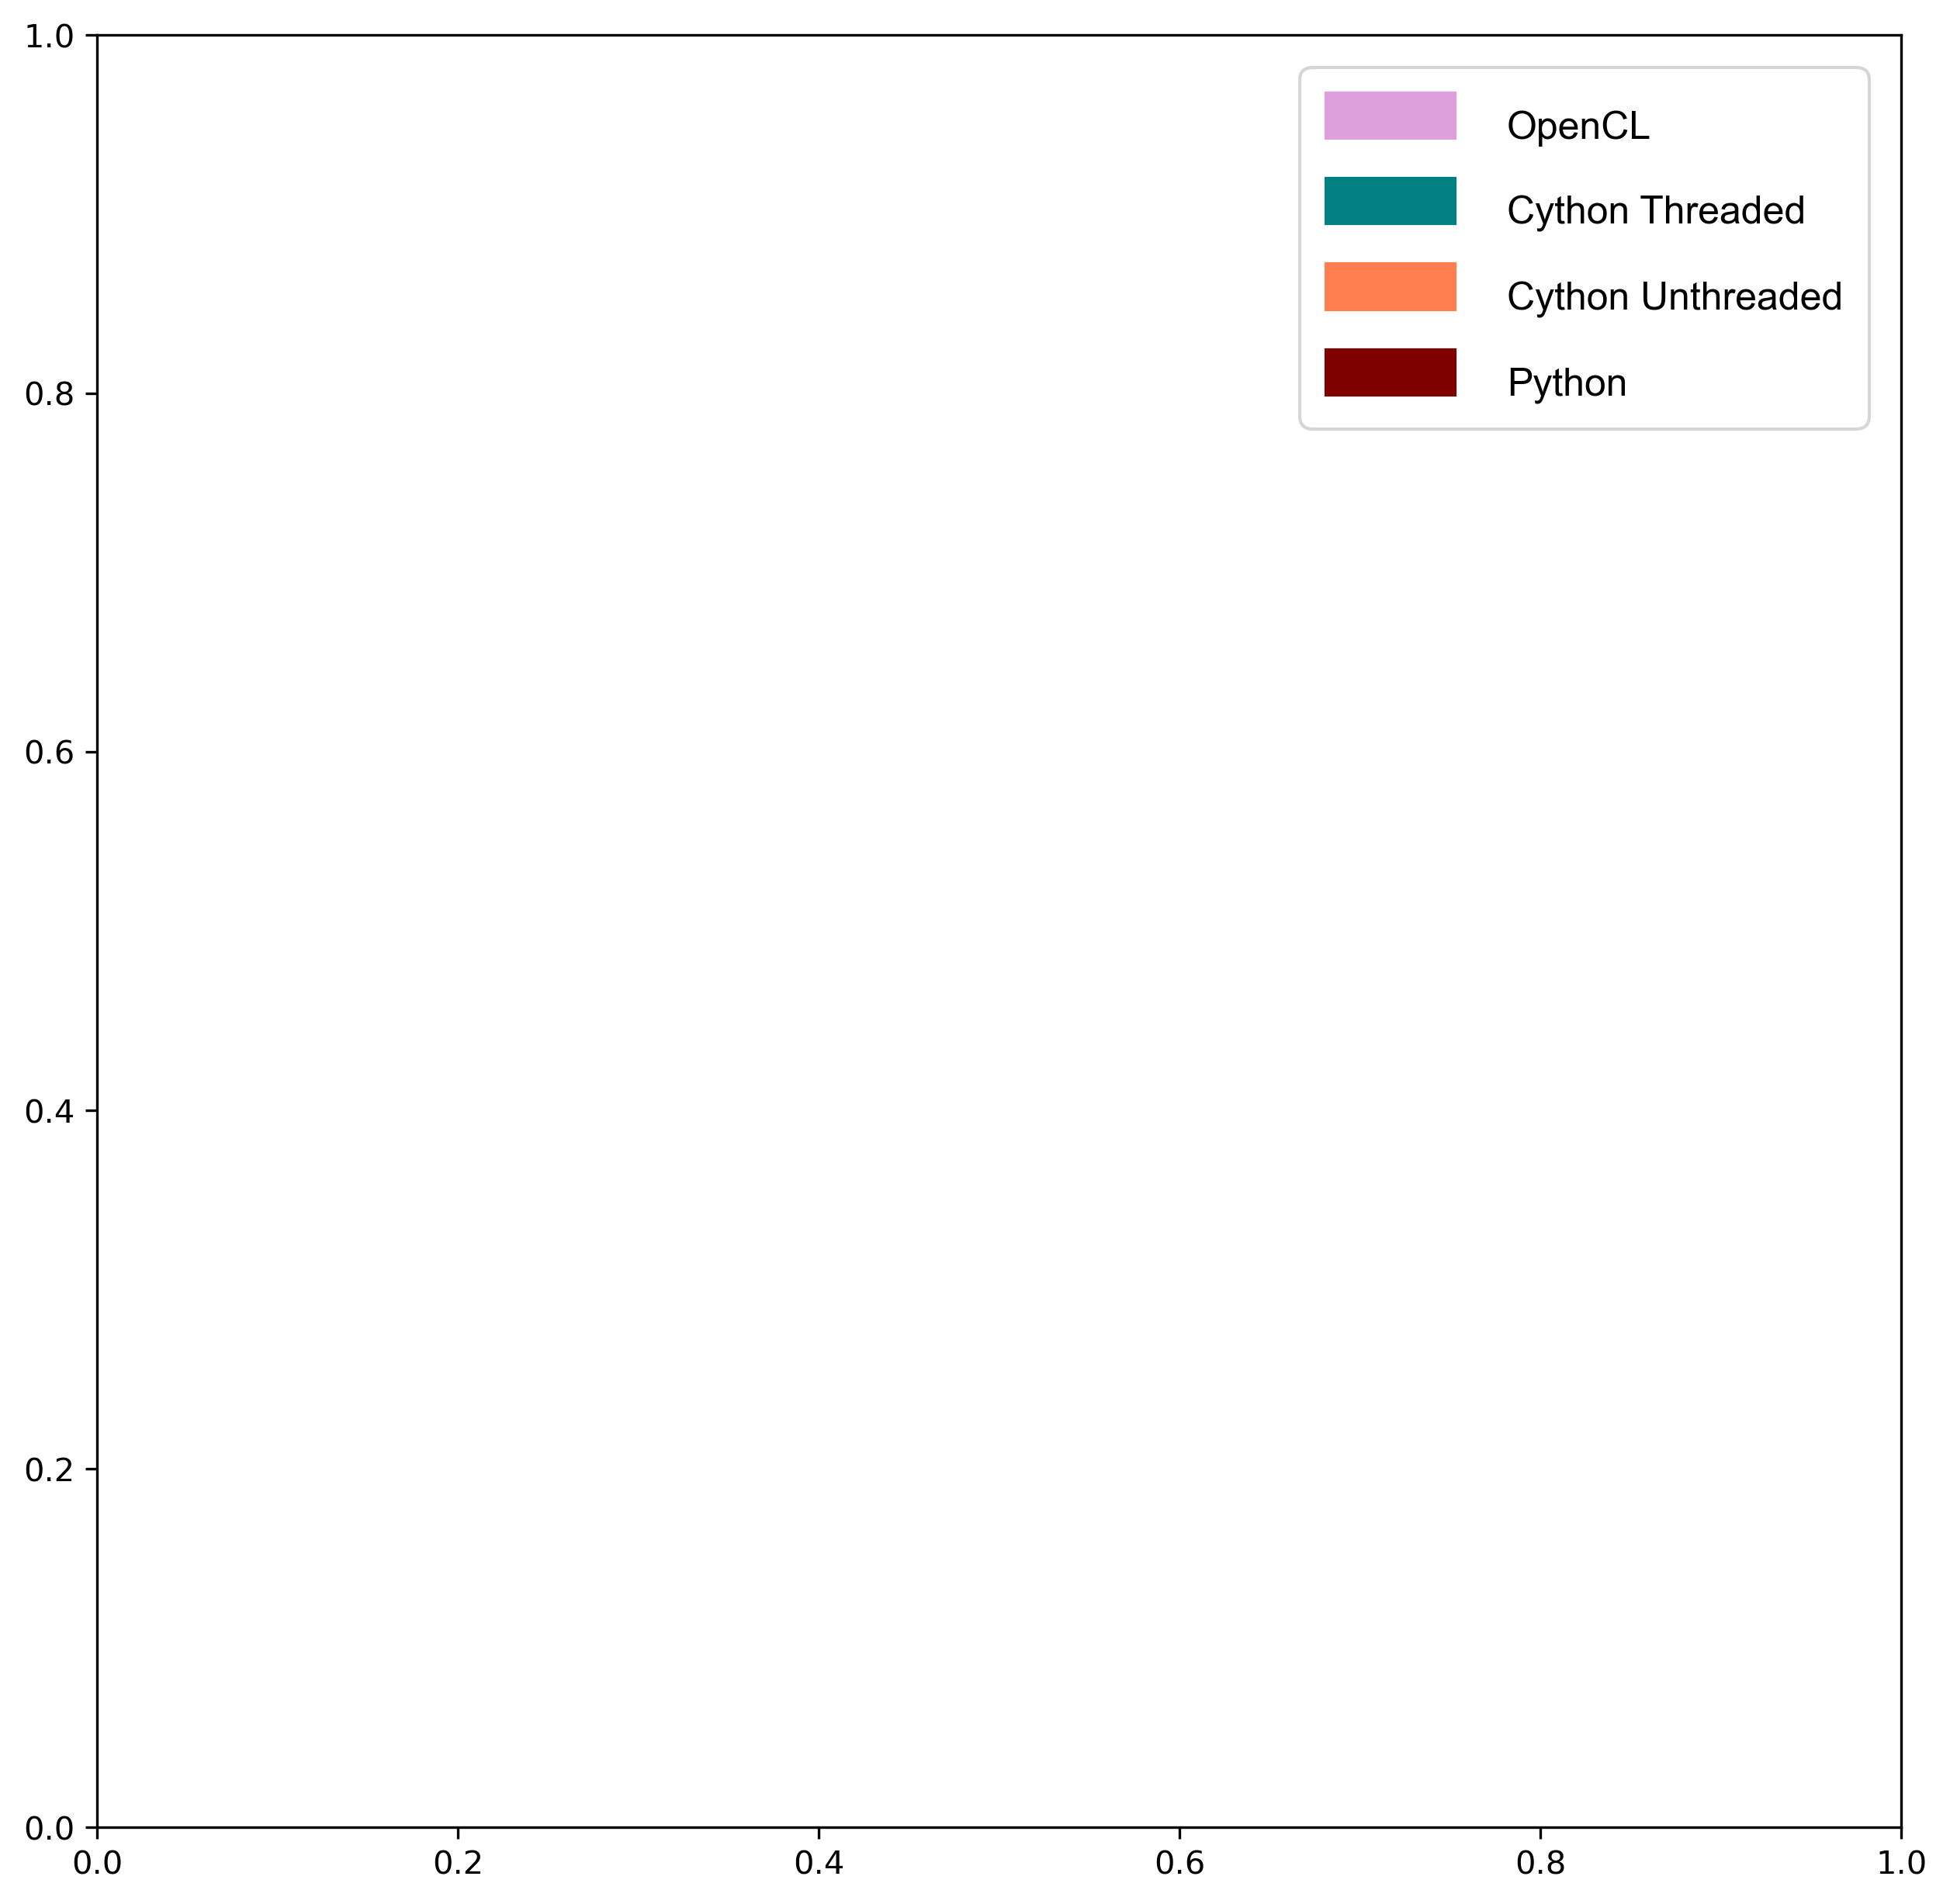

In [71]:
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple

plt.figure(figsize=(10,10), dpi=300)

colors = ["plum", "teal", "coral","maroon"]

gear_names = ['OpenCL', 'Cython Threaded', 'Cython Unthreaded', 'Python']

patches_cmaps_gradients = []
for idx, color in enumerate(colors):
    cmap_gradient = patches.Patch(facecolor=color, edgecolor=color, label=gear_names[idx])
    patches_cmaps_gradients.append(cmap_gradient)

# Create custom legend (with a large fontsize to better illustrate the result)
plt.legend(handles=patches_cmaps_gradients, labels=gear_names, fontsize=20,
           handler_map={list: HandlerTuple(ndivide=None, pad=0)})
plt.setp(plt.gca().get_legend().get_texts(), fontname="Arial", fontsize=12)

plt.show()